In [2]:
# *********************************************INDEXING:
# MULTIINDEX SERIES:
import pandas as pd
import numpy as np

rng=np.random.RandomState(0)
s=pd.Series(rng.randn(9),
           index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],[1, 2, 3, 1, 3, 1, 2, 2, 3]])
s

a  1    1.764052
   2    0.400157
   3    0.978738
b  1    2.240893
   3    1.867558
c  1   -0.977278
   2    0.950088
d  2   -0.151357
   3   -0.103219
dtype: float64

In [9]:
s.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [11]:
# slicing using "outer" level:
s['b':'c']

b  1    2.240893
   3    1.867558
c  1   -0.977278
   2    0.950088
dtype: float64

In [14]:
# slicing using "inner" level:
s.loc[:, 2]

a    0.400157
c    0.950088
d   -0.151357
dtype: float64

In [15]:
# reshaping:
s.unstack()

,1,2,3
a,1.764052,0.400157,0.978738
b,2.240893,NaN,1.867558
c,-0.977278,0.950088,NaN
d,NaN,-0.151357,-0.103219


In [16]:
s.unstack().stack()  # coming back to the previous shape

a  1    1.764052
   2    0.400157
   3    0.978738
b  1    2.240893
   3    1.867558
c  1   -0.977278
   2    0.950088
d  2   -0.151357
   3   -0.103219
dtype: float64

In [18]:
# MULTIINDEX DATAFRAME (both axes):
df=pd.DataFrame(rng.randn(12).reshape(4,3),
               index=[['a', 'a', 'b', 'b'],[1,2,1,2]],
               columns=[['Ohio', 'Ohio', 'Colorado'],
                       ['Green', 'Red', 'Green']])
df

Ohio            Colorado
        Green       Red     Green
a 1  0.410599  0.144044  1.454274
  2  0.761038  0.121675  0.443863
b 1  0.333674  1.494079 -0.205158
  2  0.313068 -0.854096 -2.552990

In [19]:
# adding names to the hierarchical levels:
df.index.names=['key1', 'key2']
df.columns.names=['state', 'color']
df

state          Ohio            Colorado
color         Green       Red     Green
key1 key2                              
a    1     0.410599  0.144044  1.454274
     2     0.761038  0.121675  0.443863
b    1     0.333674  1.494079 -0.205158
     2     0.313068 -0.854096 -2.552990

In [20]:
df['Ohio']

color         Green       Red
key1 key2                    
a    1     0.410599  0.144044
     2     0.761038  0.121675
b    1     0.333674  1.494079
     2     0.313068 -0.854096

In [25]:
df.loc['a']

state      Ohio            Colorado
color     Green       Red     Green
key2                               
1      0.410599  0.144044  1.454274
2      0.761038  0.121675  0.443863

In [26]:
# reordering levels:
df.swaplevel('key1', 'key2')

state          Ohio            Colorado
color         Green       Red     Green
key2 key1                              
1    a     0.410599  0.144044  1.454274
2    a     0.761038  0.121675  0.443863
1    b     0.333674  1.494079 -0.205158
2    b     0.313068 -0.854096 -2.552990

In [30]:
df2=df.swaplevel('key1', 'key2')
df2.swaplevel('key1', 'key2')  # returns to the original state

state          Ohio            Colorado
color         Green       Red     Green
key1 key2                              
a    1     0.410599  0.144044  1.454274
     2     0.761038  0.121675  0.443863
b    1     0.333674  1.494079 -0.205158
     2     0.313068 -0.854096 -2.552990

In [31]:
# summary statistics:
df.sum(level='key2')

state      Ohio            Colorado
color     Green       Red     Green
key2                               
1      0.744273  1.638123  1.249115
2      1.074105 -0.732421 -2.109127

In [33]:
df.sum(level='color', axis=1) # refering to the column levels the axis=1 parameter must be added

color         Green       Red
key1 key2                    
a    1     1.864872  0.144044
     2     1.204901  0.121675
b    1     0.128516  1.494079
     2    -2.239922 -0.854096

In [43]:
# defining index after df creation:
df3 = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
    'c': ['one', 'one', 'one', 'two', 'two',
    'two', 'two'],
    'd': [0, 1, 2, 0, 1, 2, 3]})
df3

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [46]:
df4=df3.set_index(['c', 'd'], drop=False) # drop=False - allows to keep columns converted to the indexes as a part of df
df4

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [52]:
# ************************************************COMBINING AND MERGING DATASETS;
# join -> is using index by default (columns are from both tables)
# merge -> is using common column (detected automatically by the same col name or defined in "on" parameter)

df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})

print(df1)
print(df2)

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6
  key  data2
0   a      0
1   b      1
2   d      2


In [50]:
pd.merge(df1, df2)  # like inner join, automatically detects common column, or might be specified in the on='col_name' parameter

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [53]:
# dfs with different name of common column - adding left/right_on:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})
pd.merge(df3, df4, left_on='lkey', right_on='rkey')  # if key column in one table is the index column at the same time,
                                                    # instead of righ/left_on use right/left_index=True

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [55]:
df3.join(df4) # merges by index

,lkey,data1,rkey,data2
0,b,0,a,0.0
1,b,1,b,1.0
2,a,2,d,2.0
3,c,3,NaN,NaN
4,a,4,NaN,NaN
5,a,5,NaN,NaN
6,b,6,NaN,NaN


In [56]:
# concatenation - by default adds rows:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

pd.concat([s1,s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [57]:
pd.concat([s1,s2,s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [61]:
# concat with creation multiindex by adding keys parameter:
x=pd.concat([s1,s1,s3], keys=['one', 'two', 'three'])
x

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [62]:
x.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


In [63]:
# COMBINE_FIRST - where index in both df/series is the same or is overlapping
#               - the null values in the primary object will be filled with values from the object passed as the parameter
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
                    'b': [np.nan, 2., np.nan, 6.],
                    'c': range(2, 18, 4)})
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
                    'b': [np.nan, 3., 4., 6., 8.]})

df1.combine_first(df2) # nulls from df1 are filled with corresponding values from df2

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


In [64]:
df=pd.DataFrame(np.arange(6).reshape(2,3),
               index=pd.Index(['Ohio', 'Colorado'], name='state'),
               columns=pd.Index(['one', 'two', 'three'], name='numbers'))
df

numbers,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [70]:
df_stacked=df.stack()
df_stacked  # stacked df => new df with multiindex

state     numbers
Ohio      one        0
          two        1
          three      2
Colorado  one        3
          two        4
          three      5
dtype: int32

In [71]:
# by default the innermost level is stacked/unstacked, it might be customized by providing name/index as a parameter
df_stacked.unstack('state')  #by default would be unstacked 'numbers'

state,Ohio,Colorado
numbers,,
one,0,3
two,1,4
three,2,5


In [73]:
df_stacked.unstack()

numbers,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [77]:
#*********************************************PIVOTING LONG TO WIDE FORMAT:
df=pd.read_csv('https://raw.githubusercontent.com/justkacz/csvfiles/main/macrodata.csv')
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [119]:
# reshaping raw df to get date (format: year, month, day)-item-value:
new_index=pd.PeriodIndex(year=df.year, quarter=df.quarter)
new_col=pd.Index(['realgdp', 'infl', 'unemp'], name='item')
s2=df.reindex(columns=new_col) 
s2.index=new_index.to_timestamp('D', 'end')  # adding day, month- as the last day, month of each quarter
s2.head()

item,realgdp,infl,unemp
1959-03-31 23:59:59.999999999,2710.349,0.00,5.8
1959-06-30 23:59:59.999999999,2778.801,2.34,5.1
1959-09-30 23:59:59.999999999,2775.488,2.74,5.3
1959-12-31 23:59:59.999999999,2785.204,0.27,5.6
1960-03-31 23:59:59.999999999,2847.699,2.31,5.2


In [150]:
df4=s2.stack() # stack has added multiindex: date and item
df4=df4.reset_index().rename(columns={'level_0':'date', 0: 'value'})
# or:
#df4=df4.reset_index()
#df4.columns=(['date', 'item', 'value'])

df4.head()

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340


LONG FORMAT:

long format -> for multiple time series, or other observational data with two or more keys (here, the keys are date and item). Each row in the table represents a single observation.

In [130]:
# PIVOT = values from item spread as columns:
pivoted=df4.pivot(index='date', columns='item', values='value')
pivoted.head()

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2


In [132]:
# df4['value2']=rng.randn(len(df4))
pivoted2=df4.pivot(index='date', columns='item') # by omitting the 'values' parameter the df will get hierarchical columns 
pivoted2.head()

value                
item                           infl   realgdp unemp
date                                               
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2

In [158]:
# the same result as pivot: set_index followed by unstack:
pivoted3=df4.set_index(['date','item'])
pivoted3.unstack().head() # by default innermost level => 'item'

value                
item                           infl   realgdp unemp
date                                               
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2

In [159]:
# ************************************************PIVOTING FROM WIDE TO LONG = PD.MELT:
# id_vars => column which is the group indicator
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                    'A': [1, 2, 3],
                    'B': [4, 5, 6],
                    'C': [7, 8, 9]})
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [163]:
dfm=pd.melt(df, id_vars='key')
dfm

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [164]:
# or only a subset of colums -> listed in the value_vars parameter:
pd.melt(df, id_vars='key', value_vars=['A', 'B'])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [162]:
# coming back to the previous shape using pivot:
old=dfm.pivot(index='key', columns='variable', values='value')
old.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


********************************************************************************************************************************
                                                     PLOTTING AND VISUALISATION

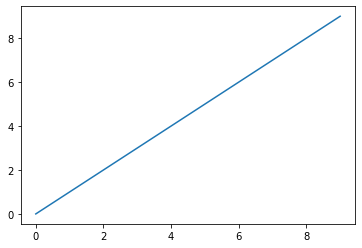

In [30]:
import matplotlib.pyplot as plt
d=np.arange(10)
plt.plot(d)

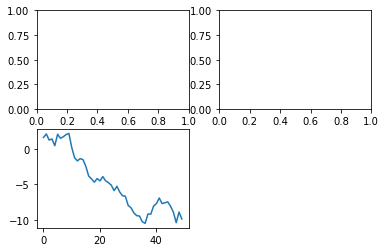

In [170]:
# FIGURE, ADDING SUBLOTS:
fig=plt.figure()

ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)

plt.plot(rng.randn(50).cumsum())

<BarContainer object of 30 artists>

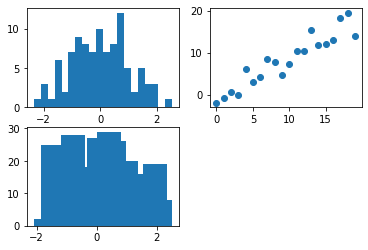

In [193]:
fig=plt.figure()

ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)

ax1.hist(rng.randn(100), bins=20)
# ax2.scatter(rng.randn(20), rng.randn(20) +3*rng.randn(20))
ax2.scatter(np.arange(20), np.arange(20) +3*rng.randn(20))
ax3.bar(x=rng.randn(30), height=np.arange(30))


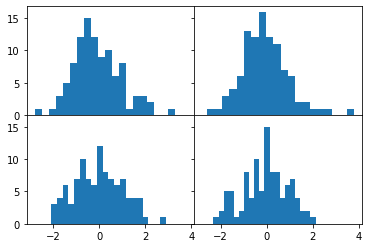

In [185]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        ax[i, j].hist(rng.randn(100), bins=20)
plt.subplots_adjust(wspace=0, hspace=0)

(-1.4500000000000002, 30.45)

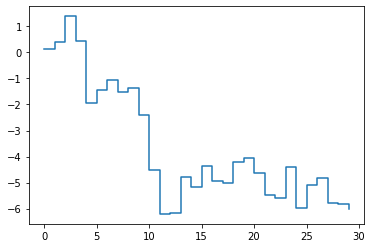

In [201]:
# STEPS-STOP:
plt.plot(rng.randn(30).cumsum(), drawstyle='steps-post')

rangex=plt.xlim() # without parameters  returns the current x-axis plotting range
rangex

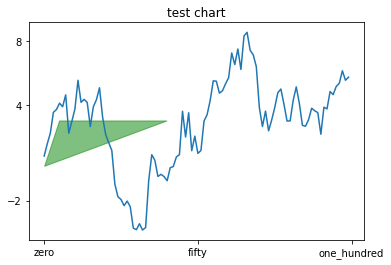

In [237]:
fig, ax = plt.subplots(1,1)

ax.plot(rng.randn(100).cumsum())
ax.set_xticks([0,50,100])
ax.set_xticklabels(['zero', 'fifty', 'one_hundred'])

# or using batch setting with ax.set:
prop={
    'title': 'test chart',
    'yticks':[-2, 4, 8]
}
ax.set(**prop)

# adding polygon (number in braces are peak coordinates x and y respectively):
pgon = plt.Polygon([[0.15, 0.15], [5, 3], [40, 3]], color='g', alpha=0.5)
ax.add_patch(pgon)

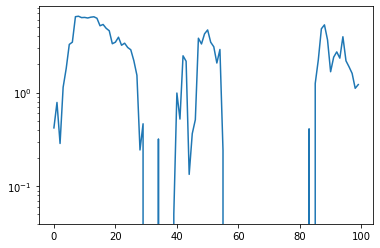

In [245]:
fig, ax = plt.subplots(1,1)
ax.plot(rng.randn(100).cumsum())
ax.set_yscale('log')    # adding logarithmic scale

In [ ]:
# RC - SETTING GLOBAL DEFAULT VALUES:
plt.rc('figure', figsize=(10, 10)) #sets the figure default size or font options:

font_options = {'family' : 'monospace',
    'weight' : 'bold',
    'size' : 'small'}

plt.rc('font', **font_options)

<AxesSubplot:>

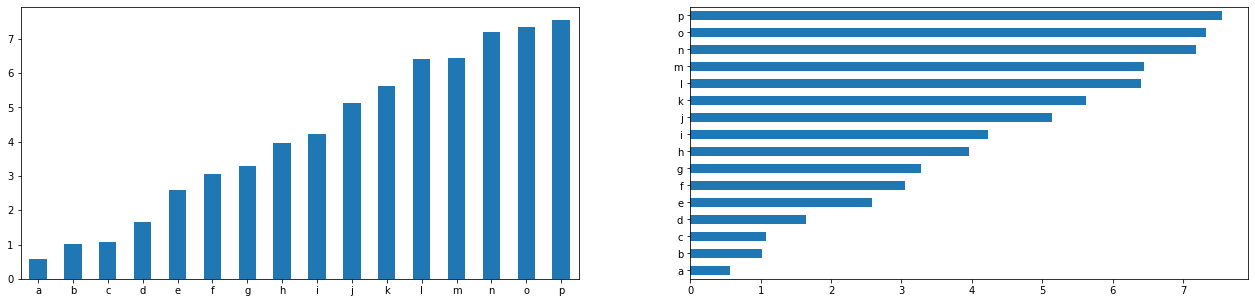

In [263]:
# plotting Series and DF:
# -> index is automatically passed for plotting on the x-axis,
# -> in DF for each column is separate plot
s=pd.Series(rng.rand(16).cumsum(), index=list('abcdefghijklmnop'))

fig, ax = plt.subplots(1,2, figsize=(22,5))
s.plot(ax=ax[0], kind='bar',rot=0) # the same as => s.plot.bar(ax=ax[0])
s.plot(ax=ax[1], kind='barh', rot=0)

In [267]:
df=pd.DataFrame(rng.rand(6,4),
              index=['one', 'two', 'three', 'four', 'five', 'six'],
                columns=pd.Index(['A', 'B', 'C', 'D'], name='Test')) # the name from pd.Index is displayed as legend title
df

Test,A,B,C,D
one,0.546075,0.261308,0.903325,0.564777
two,0.411312,0.559499,0.104467,0.111434
three,0.927285,0.218556,0.270281,0.557242
four,0.486862,0.555733,0.365429,0.405215
five,0.168799,0.497017,0.422956,0.940084
six,0.129787,0.615740,0.966526,0.097962


<AxesSubplot:>

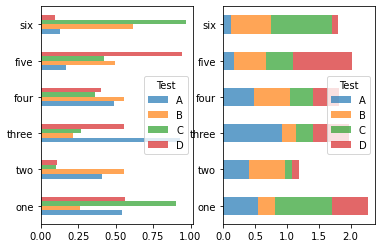

In [270]:
fig, axes=plt.subplots(1,2)
df.plot(ax=axes[0],kind='barh', alpha=0.7)
df.plot(ax=axes[1],kind='barh', stacked=True, alpha=0.7)

<AxesSubplot:>

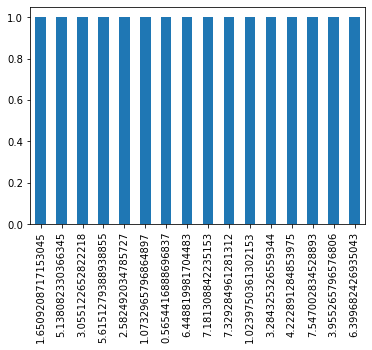

In [275]:
s.value_counts().plot.bar()

    Density plot, which is formed by computing an estimate of a continuous probability distribution that might have generated the observed data.

<AxesSubplot:ylabel='Count'>

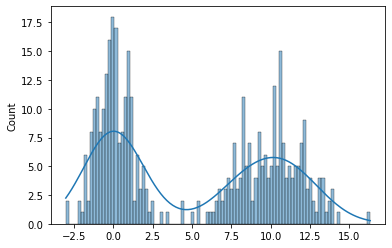

In [31]:
import seaborn as sns

x=np.random.normal(loc=0,scale=1, size=200)  # loc - centre of the distrbution, scale - spread, width of the distribution
y=np.random.normal(10, 2, size=200)
xx=pd.Series(np.concatenate([x, y]))
# sns.distplot(xx, bins=100)
sns.histplot(xx, bins=100, kde=True) # kde=True => adding line plot

In [4]:
# EXAMPLE -tips dataset:
tips=pd.read_csv('https://raw.githubusercontent.com/justkacz/csvfiles/main/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [19]:
# stacked barchart showing the percentage of data points for each party size on each day:
# crosstab -> By default computes a frequency table
t_freq=pd.crosstab(index=tips['day'], columns=tips['size'])
t_freq

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [24]:
# converting columns to rows:
tstacked=t_freq.unstack()
tstacked

size  day 
1     Fri      1
      Sat      2
      Sun      0
      Thur     1
2     Fri     16
      Sat     53
      Sun     39
      Thur    48
3     Fri      1
      Sat     18
      Sun     15
      Thur     4
4     Fri      1
      Sat     13
      Sun     18
      Thur     5
5     Fri      0
      Sat      1
      Sun      3
      Thur     1
6     Fri      0
      Sat      0
      Sun      1
      Thur     3
dtype: int64

In [25]:
tstacked=tstacked.unstack('day') # by defult the innermost column would be unstacked ('size')
tstacked

day,Fri,Sat,Sun,Thur
size,,,,
1,1,2,0,1
2,16,53,39,48
3,1,18,15,4
4,1,13,18,5
5,0,1,3,1
6,0,0,1,3


<AxesSubplot:ylabel='size'>

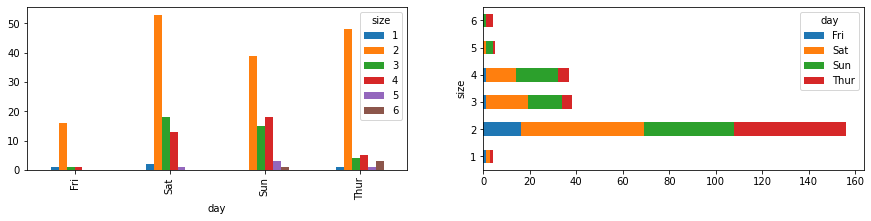

In [38]:
fig, ax = plt.subplots(1,2, figsize=(15,3))
t_freq.plot(kind='bar', ax=ax[0])
tstacked.plot(kind='barh', ax=ax[1], stacked=True)

In [43]:
# after normalization (each row sums to 1):
tfn=t_freq.div(t_freq.sum(1), axis=0)
tsn=tstacked.div(tstacked.sum(1), axis=0)
tsn

day,Fri,Sat,Sun,Thur
size,,,,
1,0.250000,0.500000,0.000000,0.250000
2,0.102564,0.339744,0.250000,0.307692
3,0.026316,0.473684,0.394737,0.105263
4,0.027027,0.351351,0.486486,0.135135
5,0.000000,0.200000,0.600000,0.200000
6,0.000000,0.000000,0.250000,0.750000


<AxesSubplot:ylabel='size'>

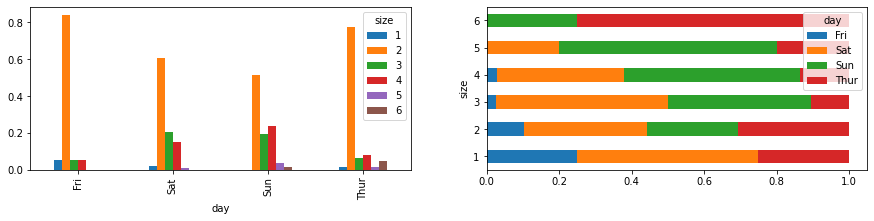

In [44]:
fig, ax =plt.subplots(1,2,figsize=(15,3))
tfn.plot(kind='bar', ax=ax[0])
tsn.plot(kind='barh', stacked=True, ax=ax[1])

In [50]:
# using seaborn:
import seaborn as sns
tips['prc']=tips['tip']/tips['total_bill']
tips.head()

,total_bill,tip,smoker,day,time,size,prc
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


<AxesSubplot:xlabel='prc', ylabel='day'>

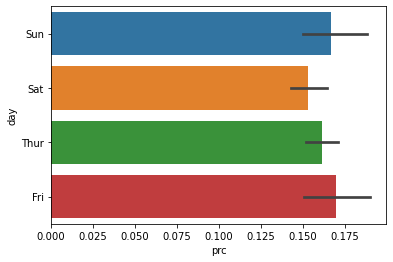

In [52]:
sns.barplot(x=tips.prc, y=tips.day, data=tips) # black lines represent 95% confidence interval

<AxesSubplot:xlabel='prc', ylabel='day'>

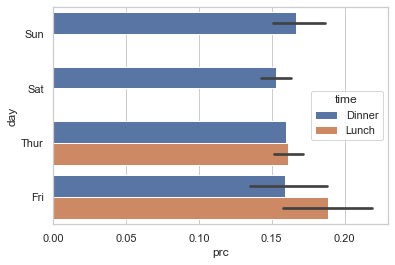

In [61]:
sns.set(style='whitegrid')
sns.barplot(x=tips.prc, y=tips.day, hue=tips.time)
#sns.barplot?

Text(0.5, 0, 'Tips percentage')

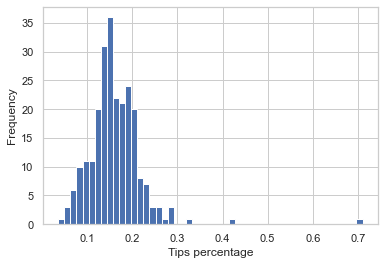

In [65]:
# histogram of tips percentage:
tips['prc'].plot.hist(bins=50)
plt.xlabel('Tips percentage')

<AxesSubplot:ylabel='Density'>

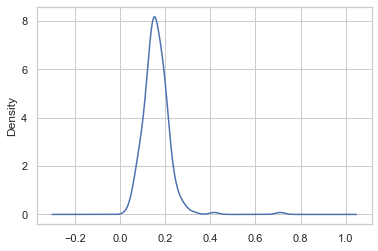

In [68]:
# density plot -> continuous probability distribution usual procedure is to approximate this distribution as a mixture 
# of “kernels”—that is, simpler distributions like the normal distribution = kernel density estimate (KDE) plots.
tips['prc'].plot.density()

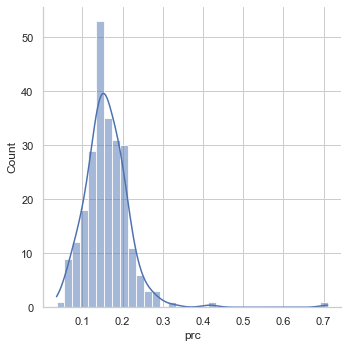

In [69]:
sns.displot(tips.prc, kde=True)

In [70]:
# ************************************************SCATTER PLOTS:
m=pd.read_csv('https://raw.githubusercontent.com/justkacz/csvfiles/main/macrodata.csv')
m.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


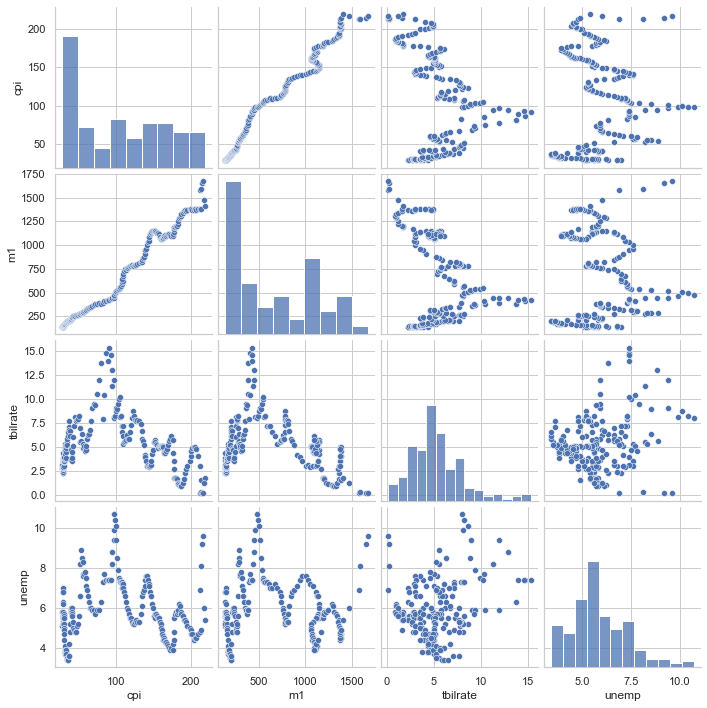

In [73]:
mdf=m[['cpi', 'm1', 'tbilrate', 'unemp']]
sns.pairplot(mdf, diag_kind='kde') # diag_kind='kde' => replaces default histogram with density plot

In [83]:
mdflog=np.log(mdf) # np.log -> natural logarithm , logarithm in base `e`(e ~ 2,71) e.g. cpi[0]-> log e (2,71) power x = 28,980
# => x=3.366606 => log e(2.71) 28.980 =x => x= 2,71 power 3,366606 = 28.980 
mdflog
mdf.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [82]:
mdflog.head()

,cpi,m1,tbilrate,unemp
0,3.366606,4.939497,1.036737,1.757858
1,3.372455,4.953712,1.124930,1.629241
2,3.379293,4.945207,1.340250,1.667707
3,3.379974,4.941642,1.465568,1.722767
4,3.385745,4.938781,1.252763,1.648659


In [86]:
df = np.log(mdf).diff().dropna()  # np.diff = out[i] = arr[i+1] – arr[i] 
df.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


<AxesSubplot:xlabel='m1', ylabel='unemp'>

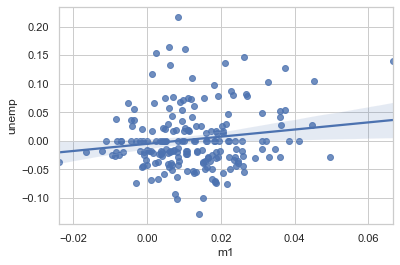

In [88]:
# REGPLOT = SCATTER PLOT + LINEAR REGRESSION
sns.regplot(x='m1', y='unemp', data=df )

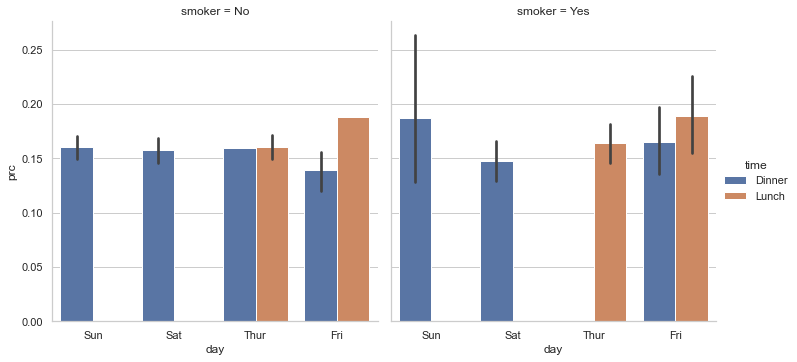

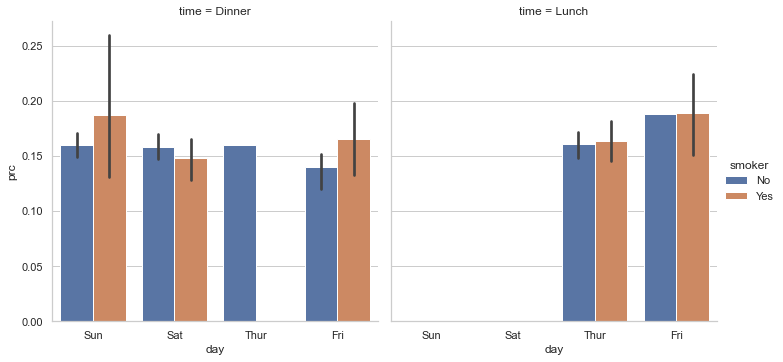

In [108]:
# CATPLOT - allows to indicate additional chart combinations:
sns.catplot(x='day', y='prc', hue='time', col='smoker', data=tips, kind='bar')
sns.catplot(x='day', y='prc', col='time', hue='smoker', data=tips, kind='bar')

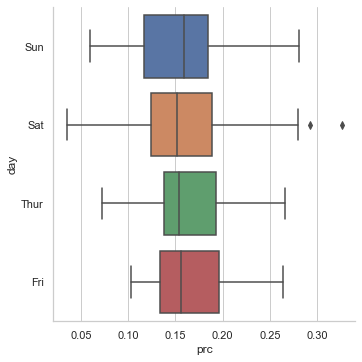

In [112]:
sns.catplot(x='prc', y='day', data=tips[tips.prc<0.4], kind='box')

In [115]:
# ************************************Data Aggregation and Group Operations
df=pd.DataFrame({'key1':['a', 'a', 'b', 'b', 'a'],
                'key2':['one', 'two', 'one', 'two', 'one'],
                'data1':rng.randn(5),
                'data2':rng.randn(5)})
df

,key1,key2,data1,data2
0,a,one,1.469359,-0.347912
1,a,two,0.154947,0.156349
2,b,one,0.378163,1.230291
3,b,two,-0.887786,1.202380
4,a,one,-1.980796,-0.387327


In [118]:
df['data1'].groupby(df['key1']).mean()  # key1 became an index

key1
a   -0.118830
b   -0.254812
Name: data1, dtype: float64

In [122]:
#multiple group by arguments = multiindex
dfg=df['data1'].groupby([df.key1, df.key2]).mean()
dfg

key1  key2
a     one    -0.255719
      two     0.154947
b     one     0.378163
      two    -0.887786
Name: data1, dtype: float64

In [123]:
dfg.index

MultiIndex([('a', 'one'),
            ('a', 'two'),
            ('b', 'one'),
            ('b', 'two')],
           names=['key1', 'key2'])

In [124]:
dfg.unstack('key1')

key1,a,b
key2,,
one,-0.255719,0.378163
two,0.154947,-0.887786


In [128]:
# groupby using series that are not included in the original dataframe:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio']) # the number of elements must be = rows number in the df
years = np.array([2005, 2005, 2006, 2005, 2006])

df['data1'].groupby([states, years]).mean()

California  2005    0.154947
            2006    0.378163
Ohio        2005    0.290787
            2006   -1.980796
Name: data1, dtype: float64

In [129]:
# the numeric columns are detected automatically:
df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.118830,-0.192963
b,-0.254812,1.216335


In [130]:
df.groupby('key1').size()

key1
a    3
b    2
dtype: int64

In [133]:
# iterating over groups:
for name, group in df.groupby(['key1', 'key2']):
    print(f'name: {name}')
    print(f'group: {group}')

name: ('a', 'one')
group:   key1 key2     data1     data2
0    a  one  1.469359 -0.347912
4    a  one -1.980796 -0.387327
name: ('a', 'two')
group:   key1 key2     data1     data2
1    a  two  0.154947  0.156349
name: ('b', 'one')
group:   key1 key2     data1     data2
2    b  one  0.378163  1.230291
name: ('b', 'two')
group:   key1 key2     data1    data2
3    b  two -0.887786  1.20238


In [134]:
# it might be useful to convert groupby output to list and then dictionary
list(df.groupby(['key1', 'key2']))

[(('a', 'one'),
    key1 key2     data1     data2
  0    a  one  1.469359 -0.347912
  4    a  one -1.980796 -0.387327),
 (('a', 'two'),
    key1 key2     data1     data2
  1    a  two  0.154947  0.156349),
 (('b', 'one'),
    key1 key2     data1     data2
  2    b  one  0.378163  1.230291),
 (('b', 'two'),
    key1 key2     data1    data2
  3    b  two -0.887786  1.20238)]

In [140]:
dict1=dict(list(df.groupby(['key1'])))
dict1

{'a':   key1 key2     data1     data2
 0    a  one  1.469359 -0.347912
 1    a  two  0.154947  0.156349
 4    a  one -1.980796 -0.387327,
 'b':   key1 key2     data1     data2
 2    b  one  0.378163  1.230291
 3    b  two -0.887786  1.202380}

In [141]:
dict1['a']

,key1,key2,data1,data2
0,a,one,1.469359,-0.347912
1,a,two,0.154947,0.156349
4,a,one,-1.980796,-0.387327


In [147]:
# grouping by column datatypes -> axis=1 (by default 0)
df.dtypes
group_dt=df.groupby(df.dtypes, axis=1)

for i, j in group_dt:
    print(i)
    print(j)

float64
      data1     data2
0  1.469359 -0.347912
1  0.154947  0.156349
2  0.378163  1.230291
3 -0.887786  1.202380
4 -1.980796 -0.387327
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


In [ ]:
# selecting a column or subset of columns: